# <span style="color: blue"> Exploring Weather Trends </span>

**Milan** is recognised internationally as one of the world's most important fashion capitals, along with Paris, New York and London. In this project, weather trends, starting since the realy 1700's, prevailing in this Italian fashion city are compared against global average. 

## Introduction
We are going to solve the problem of comparing average  temperatures in Milan and across the globe in four steps:
1. Load the local and global data from csv files
2. Explore and analyze (raw) local and global temperature data
3. Compare the temperature trends in Milan to the world. 
4. Report the similarities and/or differences between world averages and the city of Milan.

***

### 1.  Loading temperature data from csv files

In this section, we are going to load the local and global temperature data from csv files. The local (Milan) average temperature data is extracted using [SQL query-1](extract_weathertrends.sql) into [city_milan_dropNULL.csv](temp_data/city_milan_dropNULL.csv). Similarly, the global average temperature data is extracted using [SQL query-2](extract_weatherthrends.sql) into [global_milan_dropNULL.csv](temp_data/global_milan_dropNULL.csv). While creating the local and global data files, rows with no information about average temperatures are neglected. In our case, this corresponds to omitting 7 rows with no average temperature information in the city of Milan.       

In [ ]:
#
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#
# Files: local and global temp. data
ftemp_local  = 'temp_data/city_milan_dropNULL.csv'
ftemp_global = 'temp_data/global_milan_dropNULL.csv'

#
# Read csv files into a pandas dataframe
milan_df  = pd.read_csv(ftemp_local)
global_df = pd.read_csv(ftemp_global)

#
# Rename avg_temp column name to avg_milan_temp 
milan_df.rename(index=str, columns={'avg_temp': 'avg_milan_temp'}, inplace=True)

Moving averages of temperatures are calculated as below.  

In [72]:
#
# Calculating moving averages across milan_df: 5 and 20 
milan_df['avg_milan_temp5'] = milan_df['avg_milan_temp'].rolling(5).mean()
milan_df['avg_milan_temp20'] = milan_df['avg_milan_temp'].rolling(20).mean()
milan_df.fillna(0.0, inplace=True)
#milan_df.head()

#
# Calculating moving averages across global_df: 5 and 20 
global_df['avg_global_temp5'] = global_df['avg_global_temp'].rolling(5).mean()
global_df['avg_global_temp20'] = global_df['avg_global_temp'].rolling(20).mean()
global_df.fillna(0.0, inplace=True)
#global_df.head()

For some comparitive calculations, it is way easier to have local and global avg. temperature data in a single dataframe. Here, we are going to merge milan dataframe and global dataframe across year into a single dataframe called **df2**.

In [45]:
#
# Merge local and global temps into one
df2 = pd.merge(milan_df, global_df, on='year')
df2.head()

#
# Find year/s when global avg. temperature surpasses milan's
df2[df2.avg_milan_temp > df2.avg_global_temp].year

61    1811
Name: year, dtype: int64

### 2.  Explore and Analyse average temperature data
In this section, we are going to perform exploratory data analysis (EDA) on milan and global average temperature data that is loaded in the above section. EDA is performed by drawing a individual line plots (for milan and global temperature data) of average temperature for year starting from 1743 to 2013.

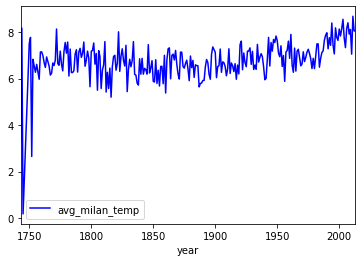

In [29]:
#
# Plot milan temperature data
milan_df.plot(kind='line', x='year', y='avg_milan_temp', color='blue')
plt.show()

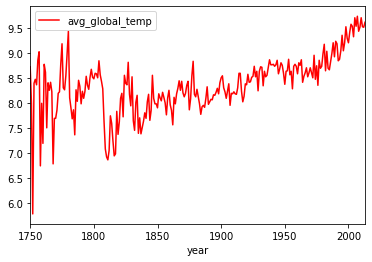

In [30]:
#
# Plot global temperature data
global_df.plot(kind='line', x='year', y='avg_global_temp', color='red')
plt.show()

***

### 3. Compare local and global average temperature data
In this section, we plot average temperatures of milan and the world on top of each other to compare the changes in average temperatures for two centuries. Firstly, we draw the raw average temperature data.

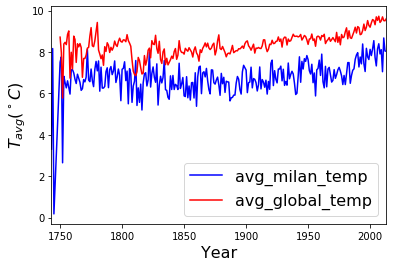

In [64]:
#
# Plot local and global raw avearge temperature data in one plot
ax_milan = milan_df.plot(kind='line', x='year', y='avg_milan_temp', color='blue')
global_df.plot(kind='line', x='year', y='avg_global_temp', color='red', ax=ax_milan)
plt.xlabel('Year', size=16)
plt.ylabel(r"$T_{avg} (^\circ C)$", size=16)
plt.legend(loc='best', fontsize=16)
plt.show()

We now plot the moving average data of average temperature over 5 days and over 20 days respectively. This allows us to clearly see the trends in global and milan's temperature data. 

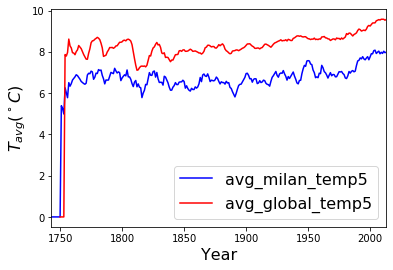

In [73]:
#
# Plot local and global ma5 temperature data in one plot
ax_milan = milan_df.plot(kind='line', x='year', y='avg_milan_temp5', color='blue')
global_df.plot(kind='line', x='year', y='avg_global_temp5', color='red', ax=ax_milan)
plt.xlabel('Year', size=16)
plt.ylabel(r"$T_{avg} (^\circ C)$", size=16)
plt.legend(loc='best', fontsize=16)
plt.show()

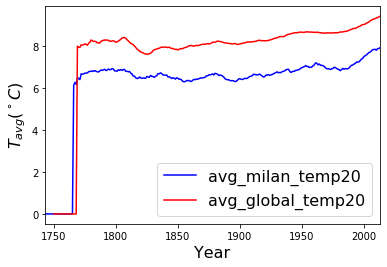

In [74]:
#
# Plot local and global ma20 temperature data in one plot
ax_milan = milan_df.plot(kind='line', x='year', y='avg_milan_temp20', color='blue')
global_df.plot(kind='line', x='year', y='avg_global_temp20', color='red', ax=ax_milan)
plt.xlabel('Year', size=16)
plt.ylabel(r"$T_{avg} (^\circ C)$", size=16)
plt.legend(loc='best', fontsize=16)
plt.show()

<span style="color: red"> Q1: Is milan hotter or cooler on average compared to the global average? Has the difference been consistent over time?
</span>
    
From the above plot, it is clearly evident that milan is cooler on average compared to the rest of the world. The average temperature in milan were consistently lower than rest of the world except in the year 1811.

<span style="color: red"> Q2: How do the changes in milan's temperatures over time compare to the changes in the global average? </span>

Milan being one of the fastest growing cities in the world, the changes in temperatures over time follows almost the same trend as the global average.

<span style="color: red"> Q3: What does the overall trend look like? Is the world getting hotter or cooler ? Has the trend been consistent over the last few hundred years? </span>

An increasing trend has been observed both in the case of milan and the world. More importantly, the average temperatures were observed to be almost constant from 1743 to 1950. In contrast, an increase in average temperatures at a much higher rate since 1950's is observed both in milan and across the world. It may not be so difficult to highlight the reason behind the world getting hotter year by year to **global warming**.     